In [9]:
# Copyright (c) 2022 - for information on the respective copyright owner see the NOTICE file or the repository https://github.com/boschresearch/the-atlas-benchmark
#
# SPDX-License-Identifier: Apache-2.0

# System imports
import yaml
from context import Dataset
from context import Predictor_CVM
from context import Predictor_sof, Predictor_zan, Predictor_kara, TrajectronPredictor
from context import Evaluator
import numpy as np

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [10]:
input_dataset = '../cfg/dataset_config_mmcp.yaml'

with open(input_dataset, 'r') as file:
    benchmark_cfg = yaml.load(file, Loader=yaml.FullLoader)


dataset = Dataset(benchmark_cfg, split=[0,1])

c:\Dokumente\Studium\HiWi\code\Atlas\the-atlas-benchmark\src\dataset.py:85: UserWarning: loadtxt: Empty input file: "c:\Dokumente\Studium\HiWi\code\Atlas\the-atlas-benchmark/dataset/destinations-mmcp.txt"
  return np.loadtxt(ROOT_DIR+goal_path)


In [ ]:
print(f'Dataset Max-Frame-ID: {dataset.max_frame}')
print(f'Dataset Min-Frame-ID: {dataset.min_frame}')

Dataset Max-Frame-ID: 244)
Dataset Min-Frame-ID: 69)


In [12]:
observation_len = benchmark_cfg['benchmark']['setup']['observation period']
prediction_horizon = benchmark_cfg['benchmark']['setup']['prediction horizon']

# Here we iterate over all possible start frames in the dataset and extract the valid scenarios
# with sufficient observations for all detected pedestrians and the ground truth data
valid_scenes = dataset.extract_scenarios(prediction_horizon, observation_len)

The mmcp dataset has 168 valid scenes with observation length 6 and prediction horizon 3 out of 175 scenes total.


In [21]:
#load CVM predictor config
with open('../cfg/method_config_kara.yaml', 'r') as file:
    method_cfg = yaml.load(file, Loader=yaml.FullLoader)

cvm_certain = Predictor_kara(dataset, method_cfg)

#load trajectronpp predictor config
with open('../cfg/method_config_trajectronpp.yaml', 'r') as file:
    method_cfg = yaml.load(file, Loader=yaml.FullLoader)

#selected_idx = np.random.randint(0, len(valid_scenes)-1)
selected_idx = 100
print(f'Selected scenario index: {selected_idx}')

method_cfg['uncertainty'] = False
trajecton_certain = TrajectronPredictor(valid_scenes[selected_idx], dataset)

predictions_cvm = cvm_certain.predict(valid_scenes[selected_idx])
predictions_trajecton = trajecton_certain.predict(valid_scenes[selected_idx])

Selected scenario index: 100

Loading from c:\Dokumente\Studium\HiWi\code\Atlas\the-atlas-benchmark\Trajectron-plus-plus\experiments\pedestrians\models\eth_attention_radius_3\model_registrar-100.pt
Loaded!



c:\Dokumente\Studium\HiWi\code\Atlas\the-atlas-benchmark\venv\lib\site-packages\torch\serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleDict' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
c:\Dokumente\Studium\HiWi\code\Atlas\the-atlas-benchmark\venv\lib\site-packages\torch\serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.LSTM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
c:\Dokumente\Studium\HiWi\code\Atlas\the-atlas-benchmark\venv\lib\site-packages\torch\serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.li

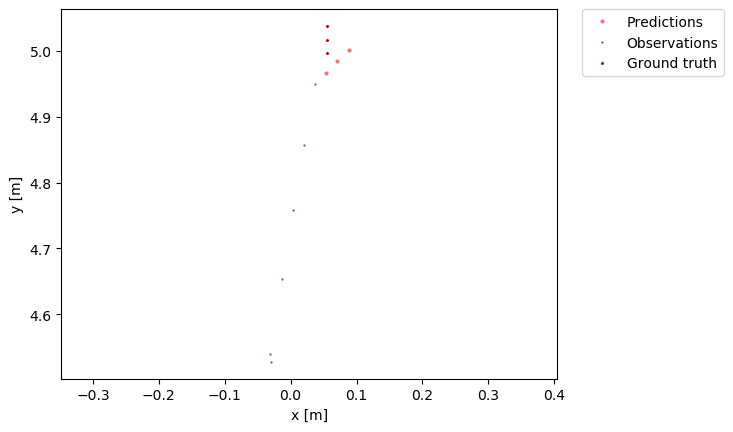

In [22]:
evaluation = Evaluator(set_GT_length=prediction_horizon)
evaluation.plot_scenario(dataset, valid_scenes[selected_idx], predictions_cvm)

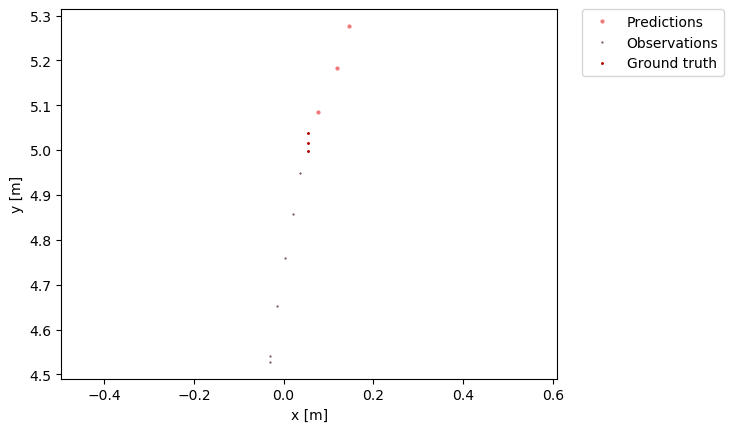

In [23]:
evaluation.plot_scenario(dataset, valid_scenes[selected_idx], predictions_trajecton)

In [24]:
import numpy as np

results_ade_trajectron = []
results_kade_trajectron = []

results_ade_cvm = []
results_kade_cvm = []

for i in range(len(valid_scenes)):
    predictions_trajecton = trajecton_certain.predict(valid_scenes[i])
    predictions_cvm = cvm_certain.predict(valid_scenes[i])

    metric_values_ade_trajectron = evaluation.evaluate_scenario_ade_fde(valid_scenes[i],predictions_trajecton)
    metric_values_kade_trajectron = evaluation.evaluate_scenario_kade_kfde(valid_scenes[i],predictions_trajecton)
    results_ade_trajectron.append(metric_values_ade_trajectron)
    results_kade_trajectron.append(metric_values_kade_trajectron)

    metric_values_ade_cvm = evaluation.evaluate_scenario_ade_fde(valid_scenes[i],predictions_cvm)
    metric_values_kade_cvm = evaluation.evaluate_scenario_kade_kfde(valid_scenes[i],predictions_cvm)
    results_ade_cvm.append(metric_values_ade_cvm)
    results_kade_cvm.append(metric_values_kade_cvm)

print('Results Trajectron:')
print('The mean ADE is', np.mean([result[0] for result in results_ade_trajectron]), '+-', np.std([result[0] for result in results_ade_trajectron]))
print('The mean FDE is', np.mean([result[1] for result in results_ade_trajectron]), '+-', np.std([result[1] for result in results_ade_trajectron]))
print('The mean kADE is', np.mean([result[0] for result in results_kade_trajectron]), '+-', np.std([result[0] for result in results_kade_trajectron]))
print('The mean kFDE is', np.mean([result[1] for result in results_kade_trajectron]), '+-', np.std([result[1] for result in results_kade_trajectron]))

print('Results CVM:')
print('The mean ADE is', np.mean([result[0] for result in results_ade_cvm]), '+-', np.std([result[0] for result in results_ade_cvm]))
print('The mean FDE is', np.mean([result[1] for result in results_ade_cvm]), '+-', np.std([result[1] for result in results_ade_cvm]))
print('The mean kADE is', np.mean([result[0] for result in results_kade_cvm]), '+-', np.std([result[0] for result in results_kade_cvm]))
print('The mean kFDE is', np.mean([result[1] for result in results_kade_cvm]), '+-', np.std([result[1] for result in results_kade_cvm]))



Results Trajectron:
The mean ADE is 0.202173667705623 +- 0.29540478578590884
The mean FDE is 0.3468435247003348 +- 0.4727786817709458
The mean kADE is 0.202173667705623 +- 0.29540478578590884
The mean kFDE is 0.3468435247003348 +- 0.4727786817709458
Results CVM:
The mean ADE is 0.32343007457775846 +- 0.38871967284570735
The mean FDE is 0.48336646728880905 +- 0.5703641987471829
The mean kADE is 0.32343007457775846 +- 0.38871967284570735
The mean kFDE is 0.48336646728880905 +- 0.5703641987471829
